# Python Programming for Machine Learning and Computer Vision

## Objective
The objective of this assignment is to assess your ability to implement Machine Learning (ML) techniques
in Python, specifically for Computer Vision tasks. You will work with image datasets, apply fundamental
image processing techniques, and implement deep learning models for classification and object detection.

## Importing important Libraries

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

## Section A: Image Processing Basics
 1. Load an image using OpenCV and perform the following operations:
 - Convert it to grayscale
 - Apply Gaussian blur
 - Detect edges using Canny edge detection
 2. Perform image transformations such as rotation, scaling, and flipping using OpenCV. Display the
 original and transformed images.

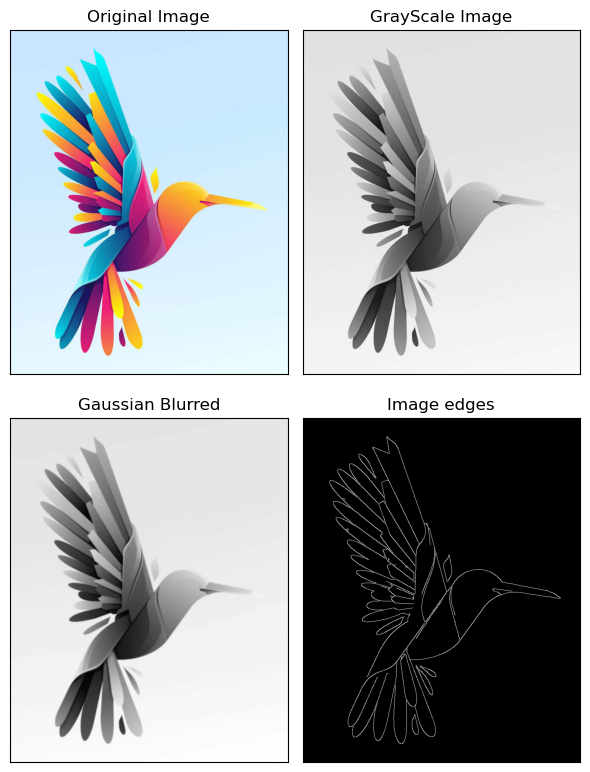

In [7]:
image = cv2.imread('bird.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gblur_image = cv2.GaussianBlur(gray_image,(5,5),0)
edges = cv2.Canny(image= rgb_image, threshold1=100, threshold2=700)

fig, axs = plt.subplots(2, 2, figsize=(6, 8))
axs[0][0].imshow(rgb_image)
axs[0][0].set_title('Original Image')
axs[0][1].imshow(gray_image, cmap='gray')
axs[0][1].set_title('GrayScale Image')
axs[1][0].imshow(gblur_image, cmap='gray')
axs[1][0].set_title('Gaussian Blurred')
axs[1][1].imshow(edges, cmap='gray')
axs[1][1].set_title('Image edges')

for axes in axs:
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

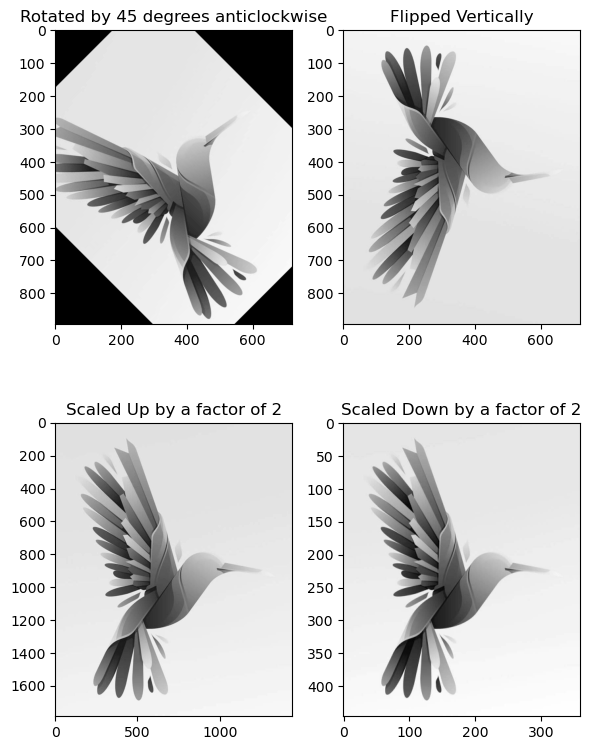

In [9]:
height, width = gray_image.shape
rotMat = cv2.getRotationMatrix2D((width//2, height//2), 45, 1)
rotated_image = cv2.warpAffine(gray_image, rotMat, (width, height))

scaled_up_image = cv2.resize(gray_image, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

scaled_down_image = cv2.resize(gray_image, (width//2, height//2), interpolation=cv2.INTER_AREA)

flipped_image = cv2.flip(gray_image, 0)

fig, axs = plt.subplots(2, 2, figsize=(6, 8))
axs[0][0].imshow(rotated_image, cmap='gray')
axs[0][0].set_title('Rotated by 45 degrees anticlockwise')
axs[0][1].imshow(flipped_image, cmap='gray')
axs[0][1].set_title('Flipped Vertically')
axs[1][0].imshow(scaled_up_image, cmap='gray')
axs[1][0].set_title('Scaled Up by a factor of 2')
axs[1][1].imshow(scaled_down_image, cmap='gray')
axs[1][1].set_title('Scaled Down by a factor of 2')

plt.tight_layout()
plt.show()

 ## Section B: Image Classification using CNN
 ### Task: Implement a CNN for Handwritten Digit Recognition
 #### Instructions:
 - UseTensorFlow/Keras and train a Convolutional Neural Network (CNN) on the MNIST dataset(Fetch
 from ML course code or online).
 - Split the dataset into training and testing sets.
 - Design a CNN with at least one convolutional layer, one pooling layer, and a dense output layer.
 - Train the model and evaluate its performance using accuracy and loss metrics.
 - Visualize training loss and accuracy using Matplotlib.
 - Submit your Python code along with a brief explanation of the steps involved.

Fetching the Dataset

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = (x_train / 255.0).reshape(-1, 28, 28, 1)
x_test = (x_test / 255.0).reshape(-1, 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Defining and Training the Model

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),

    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001) , loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size = 64)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,658,634 (6.33 MB)

 Trainable params: 1,658,634 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9034 - loss: 0.3070 - val_accuracy: 0.9858 - val_loss: 0.0414
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9845 - loss: 0.0527 - val_accuracy: 0.9875 - val_loss: 0.0347
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9906 - val_loss: 0.0276
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9912 - loss: 0.0262 - val_accuracy: 0.9911 - val_loss: 0.0293
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9941 - loss: 0.0191 - val_accuracy: 0.9918 - val_loss: 0.0266
Test Accuracy: 99.18%


Plotting the Accuracy and Loss

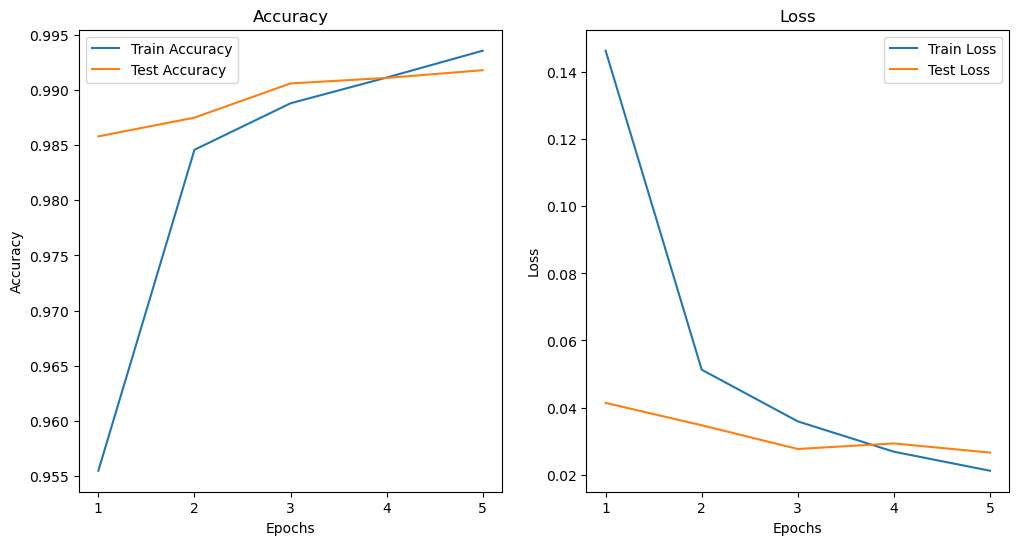

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
epochs = [1,2,3,4,5]

ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Test Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_xticks(epochs)
ax1.set_title('Accuracy')

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Test Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.set_xticks(epochs)
ax2.set_title('Loss')

plt.show()

#### Explanation

- Took the mnist data from the keras datasets containing 60000 training images and 10000 testing images and normalised them to attain value only between 0 and 1 along with one hot encoding the label values.
- Then compiled the model consisting of convolutional layers, pooling layers, fully connected layers and a output layer, also used dropout to prevent overfitting, using the Adam optimizer and categorical cross entropy loss function.
- Evaluated Accuracy and Loss plotted for visualization of model training over different epochs.

 ## Section C: Object Detection using Pre-Trained Models
 1. Use a pre-trained model such as YOLO, SSD, or Faster R-CNN to detect objects in an image of
 your choice.
 2. Load the model using OpenCV or TensorFlow/Keras.
 3. Apply object detection to at least three images (maybe a clumsy room or a forest) and visualize
 the results with bounding boxes.
 4. Provide a brief explanation of how the model works and its applications, as a text block.

Uploading the model from local files

In [39]:
yolo = cv2.dnn.readNet("yolov7.weights", "yolov7.cfg")

with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

Working on Different Images

In [42]:
def yolodetect(image):
    height, width, _ = image.shape
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), (0,0,0), swapRB=True, crop=False)

    yolo.setInput(blob)
    
    layer_names = yolo.getLayerNames()
    output_layers = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]
    layeroutput = yolo.forward(output_layers)
    
    boxes = []
    confidences = []
    class_ids = []
    
    for output in layeroutput:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
    
            if confidence > 0.7:
                centre_x = detection[0]*width
                centre_y = detection[1]*height
                w = detection[2]*width
                h = detection[3]*height
    
                x = centre_x - w/2
                y = centre_y - h/2
    
                boxes.append([x,y,w,h])
                confidences.append(confidence)
                class_ids.append(class_id)
    
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.7, nms_threshold=0.4)

    if len(indices) > 0:
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
            cv2.putText(image, f"{classes[class_ids[i]]} {confidences[i]:.2f}", (int(x), int(y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    plt.imshow(image[:,:,::-1])
    plt.show()

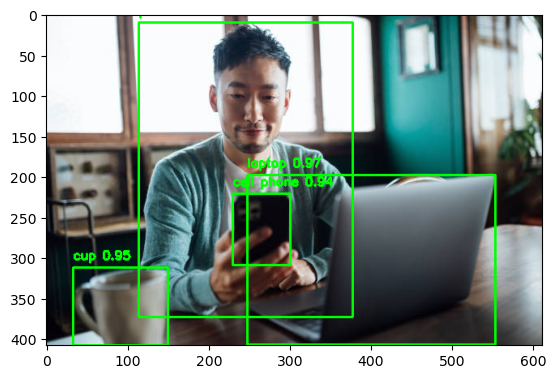

In [44]:
image = cv2.imread("sample1.jpg")
yolodetect(image)

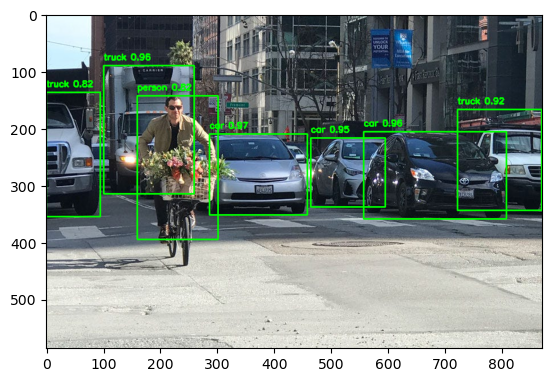

In [46]:
image = cv2.imread("sample2.jpg")
yolodetect(image)

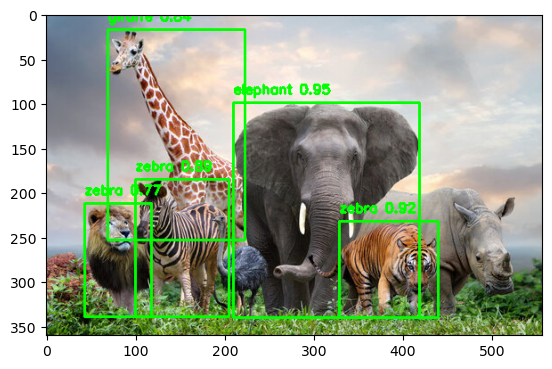

In [48]:
image = cv2.imread("sample3.jpg")
yolodetect(image)

#### Explanation

Steps:-
- YOLOv7 model published on GitHub was loaded using dnn.readNet function along with the class labels.
- Function to take image as input and predict using the YOLO written for reusable code containing the preprocessing of image, applying the model, filtering its detections and drawing the bounding boxes
- Sample Outputs shown in the next cells

Working:-\
As the word suggest(You Only Look Once), it processes the whole image all at once through a neural network where image is divided into smaller cells and the network is applied on each of the cells providing output of having object in that cell with its bounding boxes along with probability of that object being the specific classes.
For case of multiple bounding boxes for same object, we apply NMS or Non-Maximum Suppression which uses union and intersection of different bounding boxes to get the most relevant bounding box.

Application:-
- Surveillance Systems
- Automated Checkout
- Wildlife Drone Monitoring
- Medical Imaging

## Section D: Detect Triangle inside a Circle
 1. Use OpenCV API to detect shapes within an image, here triangles and circles.
 2. Implement logic to detect whether a triangle lies within another circle, if so, mark(with box or
 circle) both the circle and traingle. A triangle may lie within multiple circles.
 3. Submit atleast 3 images(testcases) validating your implementation.

In [363]:
def detect_shape(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    circles = []
    triangles = []
    
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    detected_circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 25, param1 = 100, param2 = 50, minRadius = 10, maxRadius = 200)
    
    if detected_circles is not None: 
        detected_circles = np.uint16(np.around(detected_circles))
      
        for circle in detected_circles[0, :]:
            circles.append(circle)
    
    def tri_in_cir(triangle, circles):
        def point_in_cir(point, circle_center, circle_radius):
            distance = np.sqrt((point[0] - circle_center[0]) ** 2 + (point[1] - circle_center[1]) ** 2)
            return distance <= circle_radius

        inside_circles = []
        for circle in circles:
            center = (circle[0], circle[1])
            radius = circle[2]
    
            all_points_inside = True
            for point in triangle:
                if not point_in_cir(tuple(point[0]), center, radius):
                    all_points_inside = False
                    break
    
            if all_points_inside:
                inside_circles.append(circle)
    
        return inside_circles
        
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 3:
                triangles.append(approx)
    
    marked_image = image.copy()
    
    for circle in circles:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(marked_image, center, radius, (0, 255, 0), 3)
    
    for triangle in triangles:
        pts = np.array([triangle], np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(marked_image, [pts], True, (0, 255, 0), 3)

        inside_circles = tri_in_cir(triangle, circles)
        if inside_circles:
            cv2.polylines(marked_image, [pts], True, (0, 0, 255), 3)
            for circle in inside_circles:
                cv2.circle(marked_image, center, radius, (0, 0, 255), 3)
    
    plt.imshow(marked_image)
    plt.show()

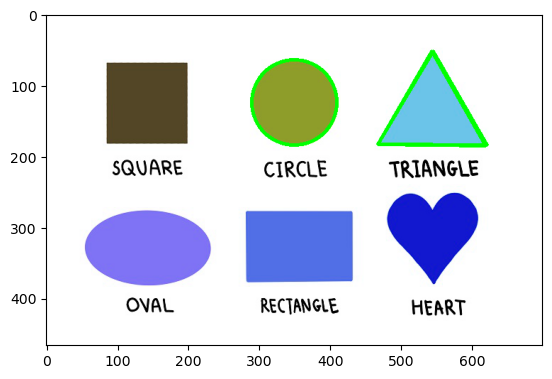

In [365]:
image = cv2.imread('sample1.png')
detect_shape(image)

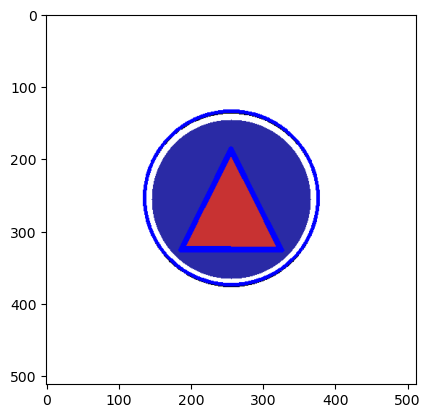

In [373]:
image = cv2.imread('sample2.png')
detect_shape(image)

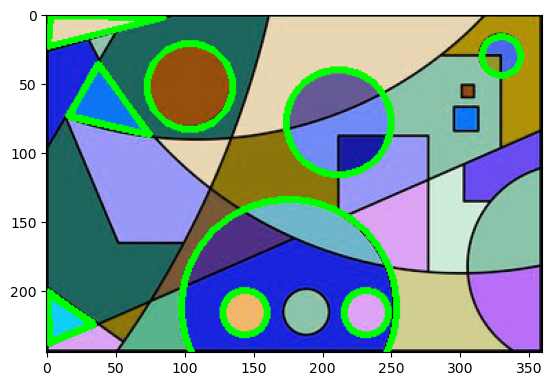

In [369]:
image = cv2.imread('sample3.png')
detect_shape(image)